In [ ]:
# pip install -U ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0fb0a7cd7b4f52292d8f078cd0ce24a9442ac95ff4f0eca344e2c68c65066299
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import folium

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from ydata_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1sjcx1kAsGBZFXOodOVISw0Om1xv4cPfe -O Pump_initial_data.csv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1sjcx1kAsGBZFXOodOVISw0Om1xv4cPfe
To: /content/Pump_initial_data.csv
100% 20.8M/20.8M [00:00<00:00, 67.9MB/s]


In [ ]:
pumps_df=pd.read_csv("Pump_initial_data.csv", parse_dates=['date_recorded'], date_format='%d/%m/%Y')

In [ ]:
#Opcion de carga local
# pumps_df=pd.read_csv("./data/Pump_initial_data.csv", parse_dates=['date_recorded'], date_format='%d/%m/%Y')

In [ ]:
pumps_df_cn = pumps_df[['basin','subvillage','region','region_code','district_code','lga','ward','population','public_meeting','recorded_by','source','waterpoint_type','extraction_type','quality_group','status_group','extraction_type_class']]
pumps_df_cn.head()

,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,source,waterpoint_type,extraction_type,quality_group,status_group,extraction_type_class
0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,spring,communal standpipe,gravity,good,functional,gravity
1,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,rainwater harvesting,communal standpipe,gravity,good,functional,gravity
2,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,dam,communal standpipe multiple,gravity,good,functional,gravity
3,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,machine dbh,communal standpipe multiple,submersible,good,non functional,submersible
4,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,rainwater harvesting,communal standpipe,gravity,good,functional,gravity


In [ ]:
profile = ProfileReport(pumps_df_cn, title="Profiling Report")
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
grouped_df = pumps_df_cn.groupby(['status_group','region',]).size().unstack(fill_value=0)
grouped_df

region,Arusha,Dar es Salaam,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,...,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga
status_group,,,,,,,,,,,,,,,,,,,,,
functional,2294,461,1009,4141,1727,1363,2640,460,987,886,...,2119,524,1502,1556,707,1480,2789,1011,848,1436
functional needs repair,175,3,209,123,304,603,322,93,96,60,...,300,126,183,36,135,164,635,128,45,73
non functional,881,341,983,1030,1285,850,1417,993,500,1023,...,1587,1080,1417,1043,966,996,1558,954,1066,1038


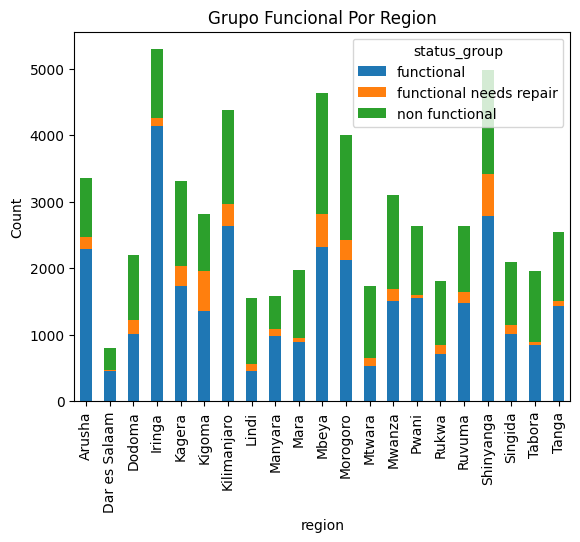

In [ ]:
grouped_df = pumps_df_cn.groupby(['region','status_group']).size().unstack(fill_value=0)
grouped_df

grouped_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('region')
plt.ylabel('Count')
plt.title('Grupo Funcional Por Region')

# Show the plot
plt.show()


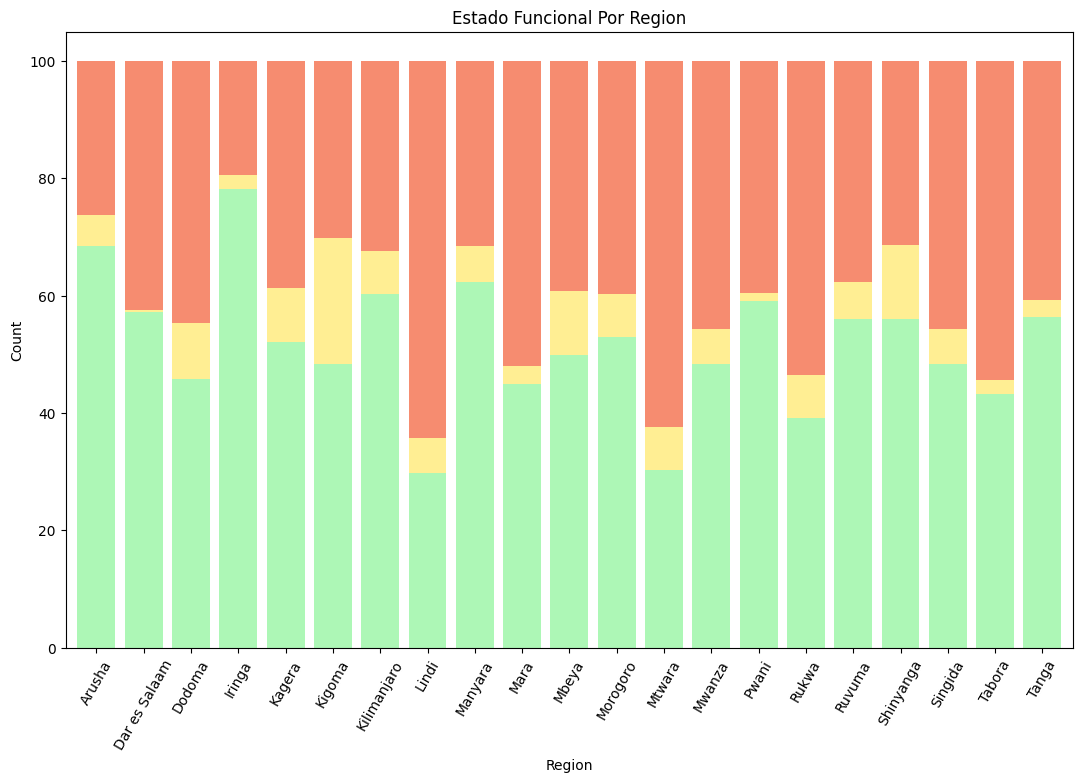

In [ ]:
grouped_df = pumps_df_cn.groupby(['region','status_group']).size().unstack(fill_value=0)
grouped_df
grouped_percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100
custom_colors = ["#adf7b6", "#ffee93", "#f68c70"]
ax = grouped_percentage_df.plot(kind='bar', stacked=True,color=custom_colors, figsize=(13, 8), width=0.8)


plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Status Group')
ax.legend().set_visible(False)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Estado Funcional Por Region')

# Show the plot
plt.show()

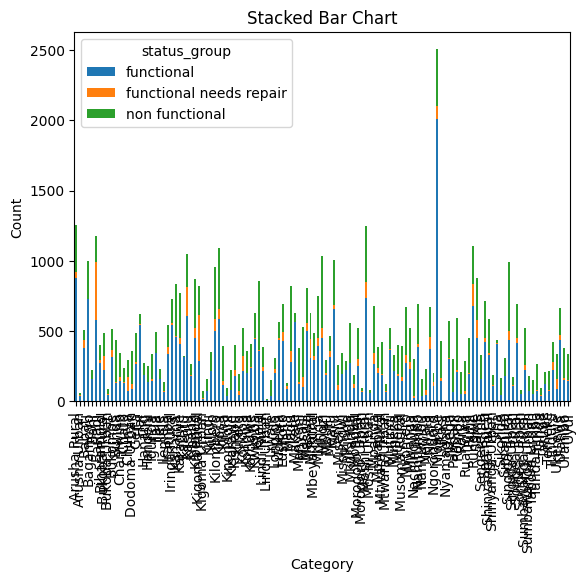

In [ ]:
grouped_df = pumps_df_cn.groupby(['lga','status_group']).size().unstack(fill_value=0)
grouped_df

grouped_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')

# Show the plot
plt.show()

In [ ]:
grouped_df = pumps_df_cn.groupby(['status_group','ward']).size().unstack(fill_value=0)
grouped_df

ward,Aghondi,Akheri,Arash,Arri,Arusha Chini,Babayu,Badi,Badugu,Bahi,Balangidalalu,...,Zagayu,Zanka,Ziba,Zinga/Ikerege,Zirai,Ziwani,Zoissa,Zombo,Zongomera,Zuzu
status_group,,,,,,,,,,,,,,,,,,,,,
functional,0,27,7,14,30,5,16,6,8,8,...,7,11,9,99,6,13,5,3,17,9
functional needs repair,0,7,0,0,0,0,1,0,0,0,...,22,0,3,0,0,0,0,0,0,1
non functional,12,11,5,5,27,5,17,11,9,11,...,6,7,4,42,1,19,11,22,16,6


<Axes: xlabel='ward', ylabel='status_group'>

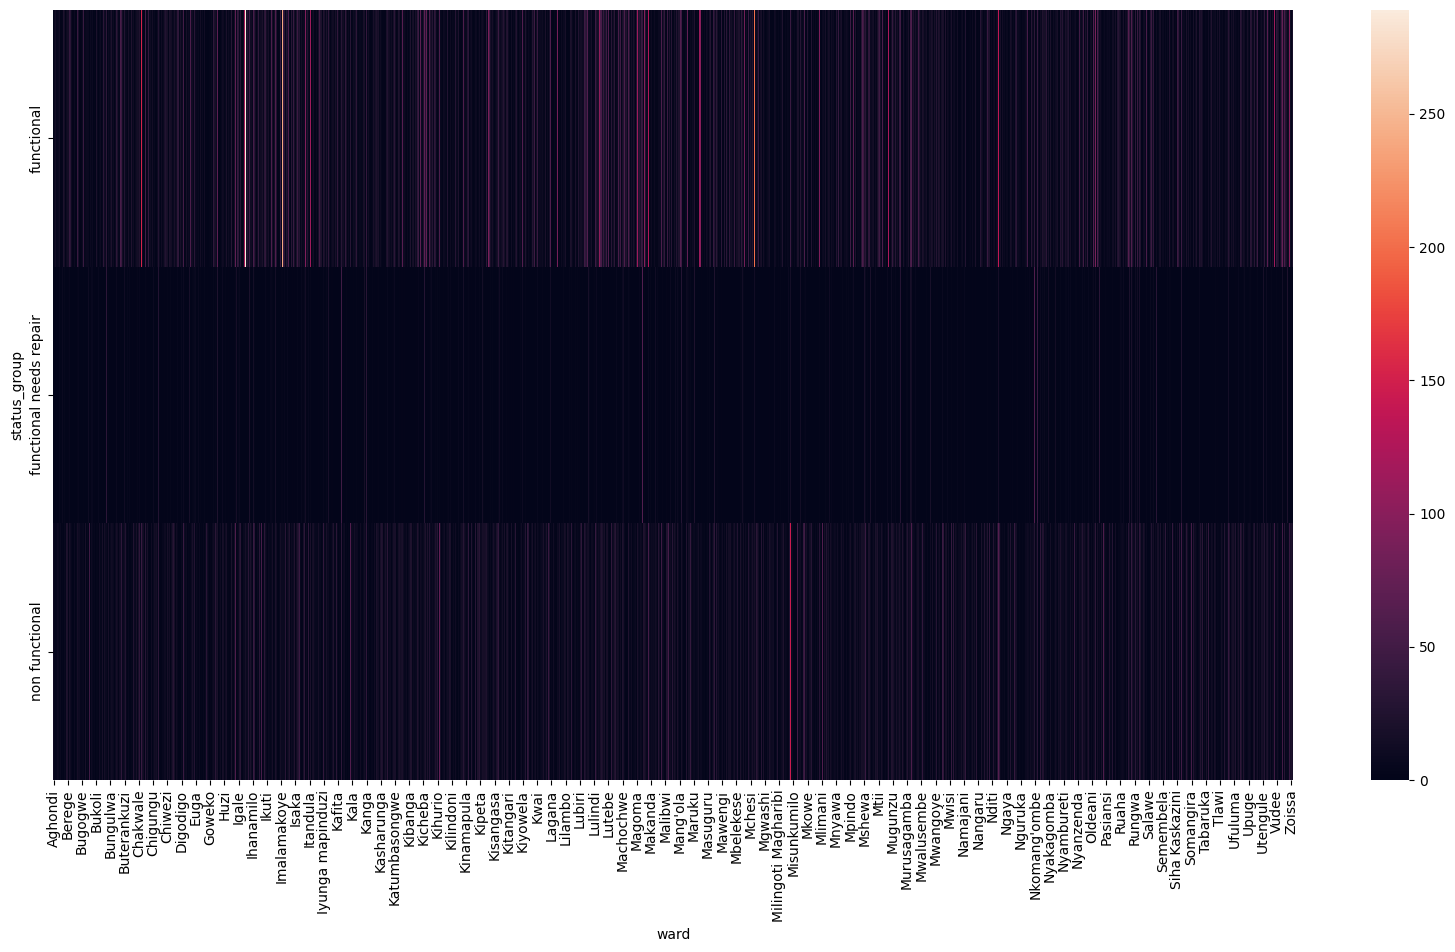

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(grouped_df)

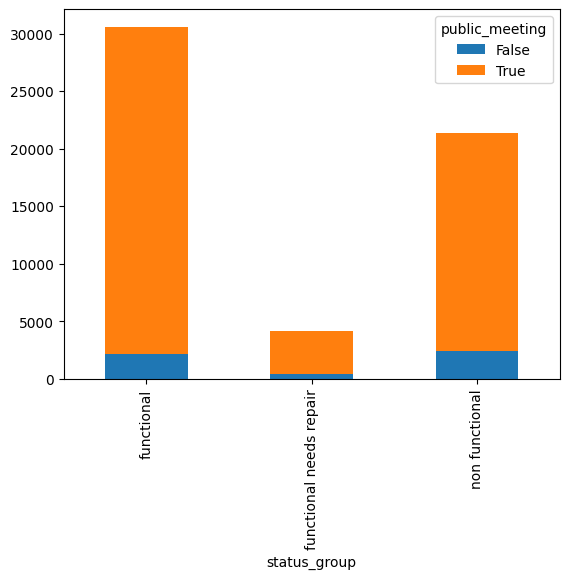

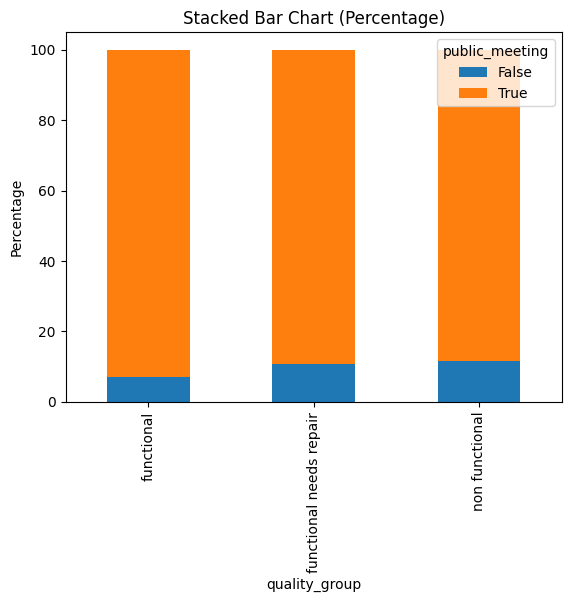

In [ ]:
grouped_df = pumps_df_cn.groupby(['status_group','public_meeting']).size().unstack(fill_value=0)
grouped_df

grouped_df.plot(kind='bar', stacked=True)

grouped_percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart with percentages
grouped_percentage_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('quality_group')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart (Percentage)')

# Show the plot
plt.show()

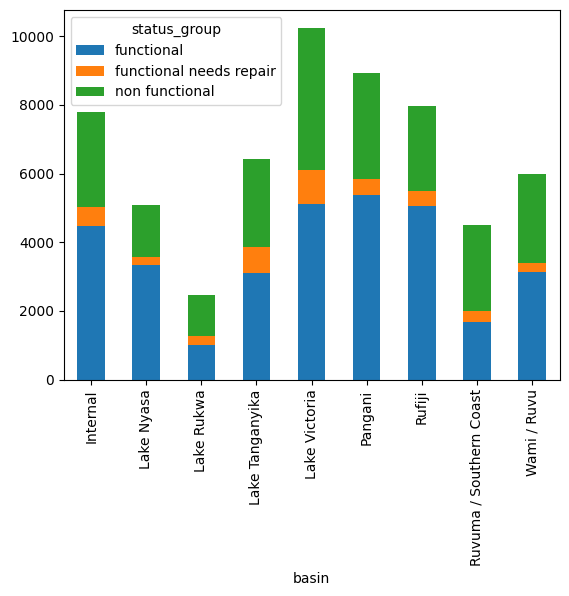

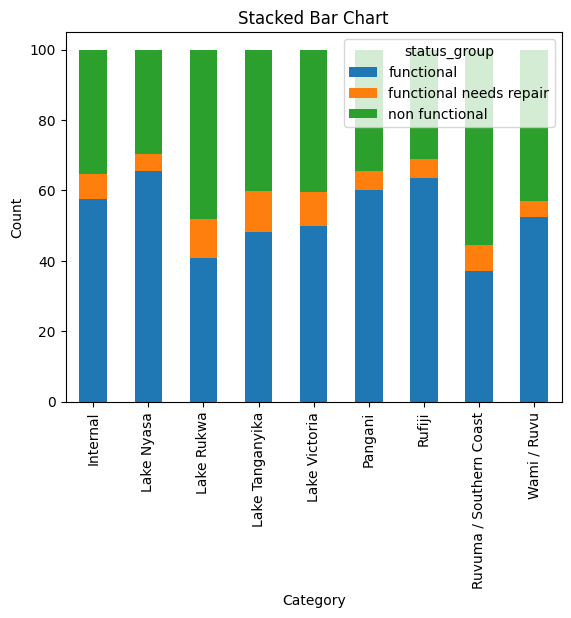

In [ ]:
grouped_df = pumps_df_cn.groupby(['basin','status_group']).size().unstack(fill_value=0)
grouped_df

grouped_df.plot(kind='bar', stacked=True)

grouped_percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart with percentages
grouped_percentage_df.plot(kind='bar', stacked=True)


# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-23-787812db8694>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumps_df_cn['population_log'] = np.log(pumps_df_cn['population'])


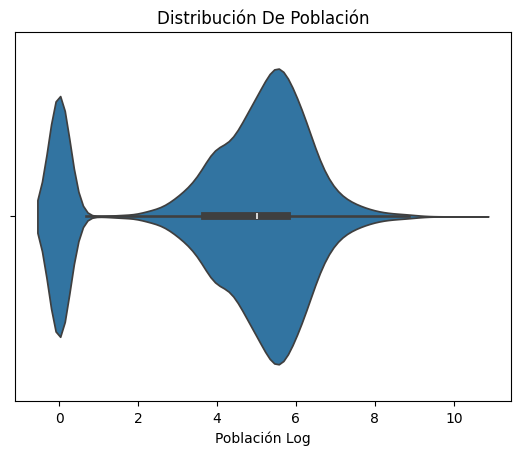

In [ ]:

pumps_df_cn['population_log'] = np.log(pumps_df_cn['population'])
sns.violinplot(x=pumps_df_cn['population_log'])
plt.title('Distribución De Población')
plt.xlabel('Población Log')
plt.show()

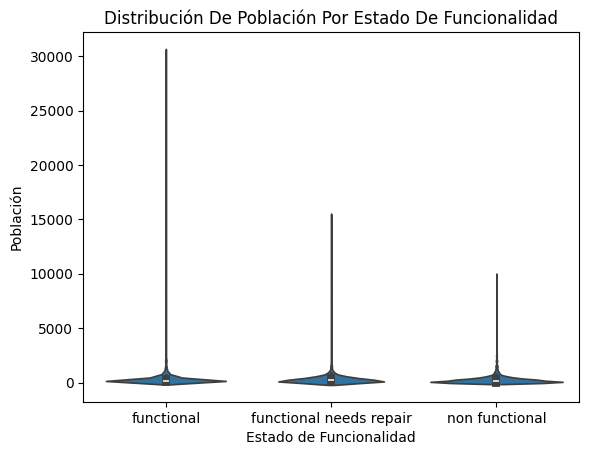

In [ ]:
pumps_df_cn_1=pumps_df_cn[pumps_df_cn['population'] >0]
sns.violinplot(x=pumps_df_cn_1['status_group'], y=pumps_df_cn_1['population'], order=['functional', 'functional needs repair', 'non functional'])
plt.title('Distribución De Población Por Estado De Funcionalidad')
plt.xlabel('Estado de Funcionalidad')
plt.ylabel('Población')
plt.show()

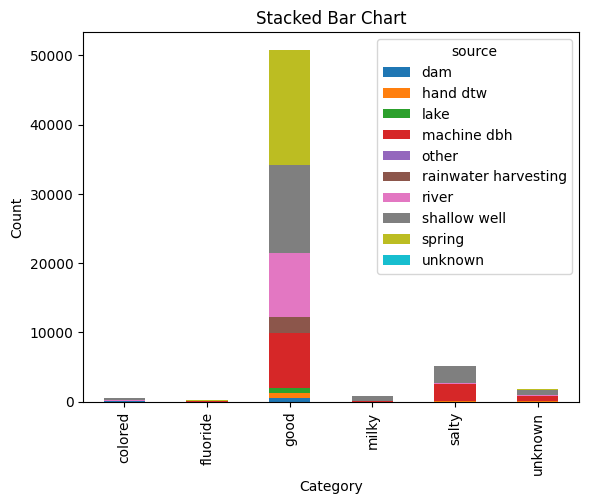

In [ ]:
grouped_df = pumps_df_cn.groupby(['quality_group','source']).size().unstack(fill_value=0)
grouped_df

grouped_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')

# Show the plot
plt.show()

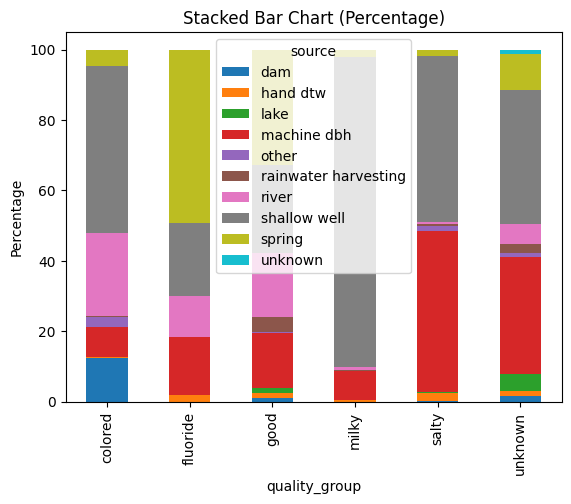

In [ ]:
grouped_df = pumps_df_cn.groupby(['quality_group','source']).size().unstack(fill_value=0)
grouped_df


grouped_percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart with percentages
grouped_percentage_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('quality_group')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart (Percentage)')

# Show the plot
plt.show()


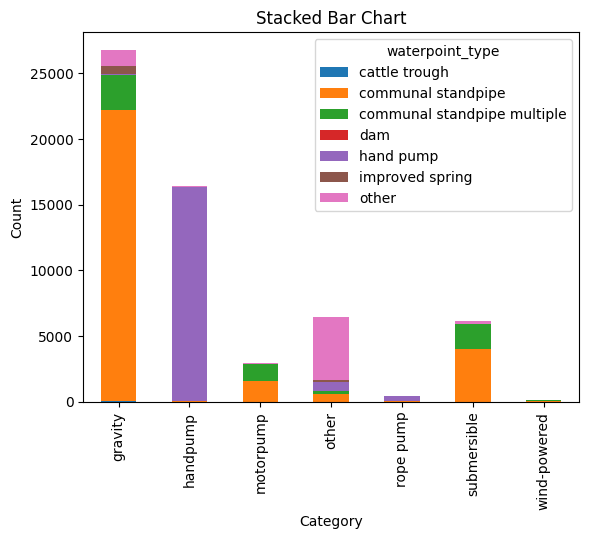

In [ ]:


grouped_df = pumps_df_cn.groupby(['extraction_type_class','waterpoint_type']).size().unstack(fill_value=0)
grouped_df

grouped_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')

# Show the plot
plt.show()

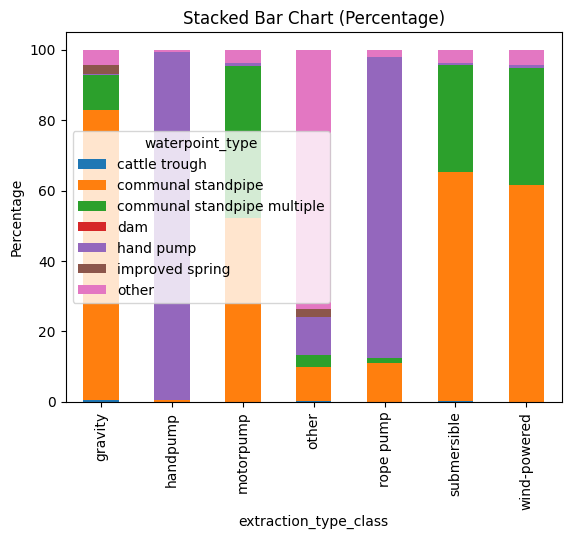

In [ ]:
grouped_df = pumps_df_cn.groupby(['extraction_type_class','waterpoint_type']).size().unstack(fill_value=0)
grouped_df


grouped_percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart with percentages
grouped_percentage_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('extraction_type_class')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart (Percentage)')

# Show the plot
plt.show()

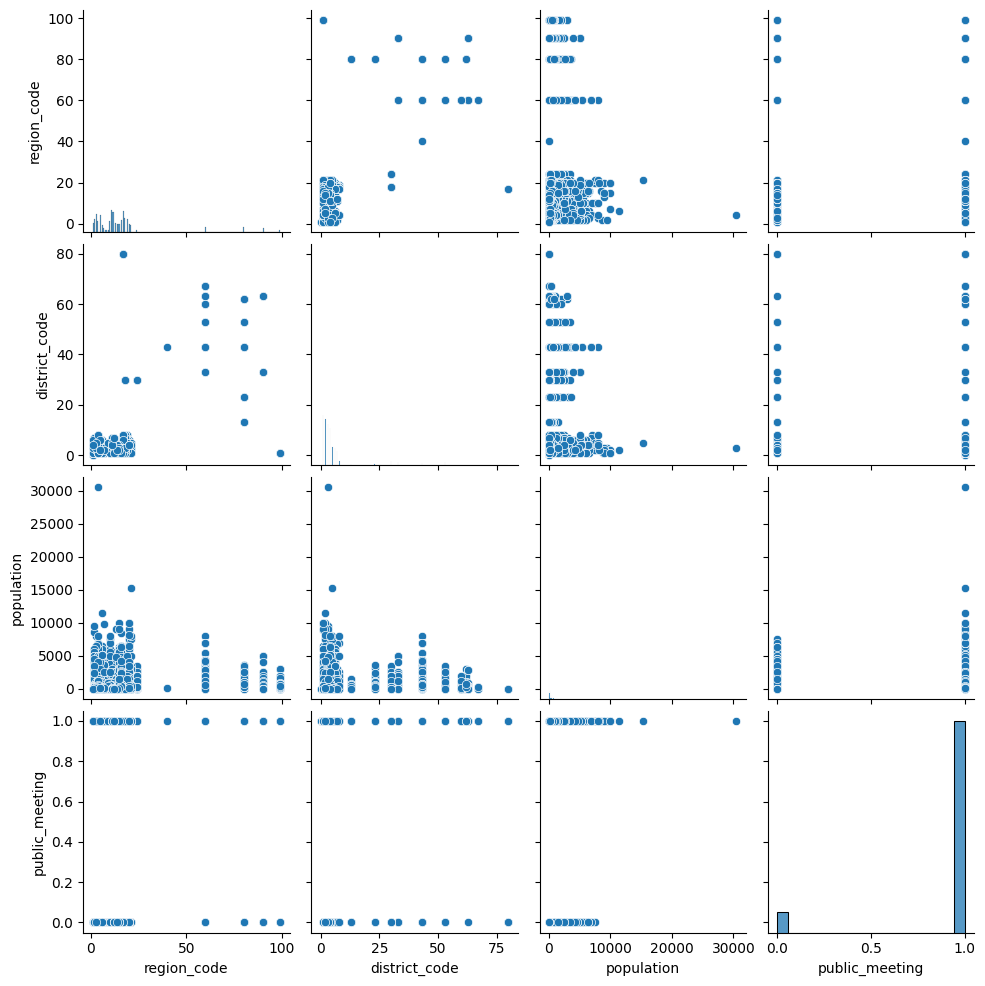

In [ ]:
sns.pairplot(pumps_df_cn)

plt.show()